# CSC6711 Project 2 - Exploring Rec Sys Data

* **Author**: Jacob Buysse

This notebook is an analysis of four datasets for recommendation systems (all files are located in the `datasets` subdirectory):
* MovieLens - `movielens_25m.feather` (Movies)
* Netflix Prize - `netflix_prize.feather` (Movies and TV Shows)
* Yahoo! Music R2 - `yahoo_r2_songs.subsampled.feather` (Songs)
* BoardGameGeek - `boardgamegeek.feather` (Board Games)

We will be using the following libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Let us configure matplotlib for readable labels, high resolution, and automatic layout.

In [2]:
matplotlib.rc('axes', labelsize=16)
matplotlib.rc('figure', dpi=150, autolayout=True)

## Dataset Inspection

Let us load the datasets and see what they provide (hint, I went back and added this after I saw the definitions were all identical).
* `df1` - MovieLens
* `df2` - Netflix
* `df3` - Yahoo Music
* `df4` - BoardGameGeek

In [3]:
df1 = pd.read_feather('./datasets/movielens_25m.feather')
df2 = pd.read_feather('./datasets/netflix_prize.feather')
df3 = pd.read_feather('./datasets/yahoo_r2_songs.subsampled.feather')
df4 = pd.read_feather('./datasets/boardgamegeek.feather')

Let us define some helper functions for analyzing the datasets and displaying graphs.

In [4]:
def display_stats(df):
    # Display information about the pandas dataframe
    display(df)
    display(df.describe())
    df.info()
    print("")

    # Compute the item, user, rating, and total counts and then the rating density
    rating_count = df.shape[0]
    item_count = df.item_id.nunique()
    user_count = df.user_id.nunique()
    total_count = item_count * user_count
    density = rating_count / total_count

    # Display the computed values
    print(f"{rating_count:,} total ratings")
    print(f"{item_count:,} distinct item IDs")
    print(f"{user_count:,} distinct user IDs")
    print(f"{total_count:,} total possible ratings")
    print(f"{density:.2%} density")

## MovieLens Analysis

Let us inspect the MoveLens dataset.

In [5]:
display_stats(df1)

,item_id,user_id,rating
0,296,1,5.0
1,306,1,3.5
2,307,1,5.0
3,665,1,5.0
4,899,1,3.5
...,...,...,...
25000090,50872,162541,4.5
25000091,55768,162541,2.5
25000092,56176,162541,2.0
25000093,58559,162541,4.0


,item_id,user_id,rating
count,2.489058e+07,2.489058e+07,2.489058e+07
mean,2.083573e+04,8.120344e+04,3.536225e+00
std,3.828946e+04,4.680652e+04,1.059729e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.196000e+03,4.051000e+04,3.000000e+00
50%,2.918000e+03,8.094800e+04,3.500000e+00
75%,8.446000e+03,1.215920e+05,4.000000e+00
max,2.087370e+05,1.625410e+05,5.000000e+00


<class 'pandas.core.frame.DataFrame'>
Index: 24890583 entries, 0 to 25000094
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   item_id  int64  
 1   user_id  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 759.6 MB

24,890,583 total ratings
24,330 distinct item IDs
162,541 distinct user IDs
3,954,622,530 total possible ratings
0.63% density


So we have 24.9M ratings by item_id/user_id.  Ratings are from 0.5 to 5 (so assuming a star rating system where you can't give a zero-rating and where every record has a rating - so no nulls).

So there are around 24k different movies and 162k different users which makes this a sparse rating matrix (otherwise there would be around 4B ratings) of only 0.63% populated values.

In [6]:
df1_counts = df1.groupby('item_id')[['rating']].count()
df1_counts.describe()

,rating
count,24330.000000
mean,1023.040814
std,3780.192399
min,10.000000
25%,20.000000
50%,62.000000
75%,386.000000
max,81491.000000


We can see that the 24k items are represented in the groups with the fewest ratings being 10 and the most ratings being 81k.  The mean rating count is 1k +/- 3.7k.  The mean and standard deviation would be better represented on the log of the values (per the graph below).

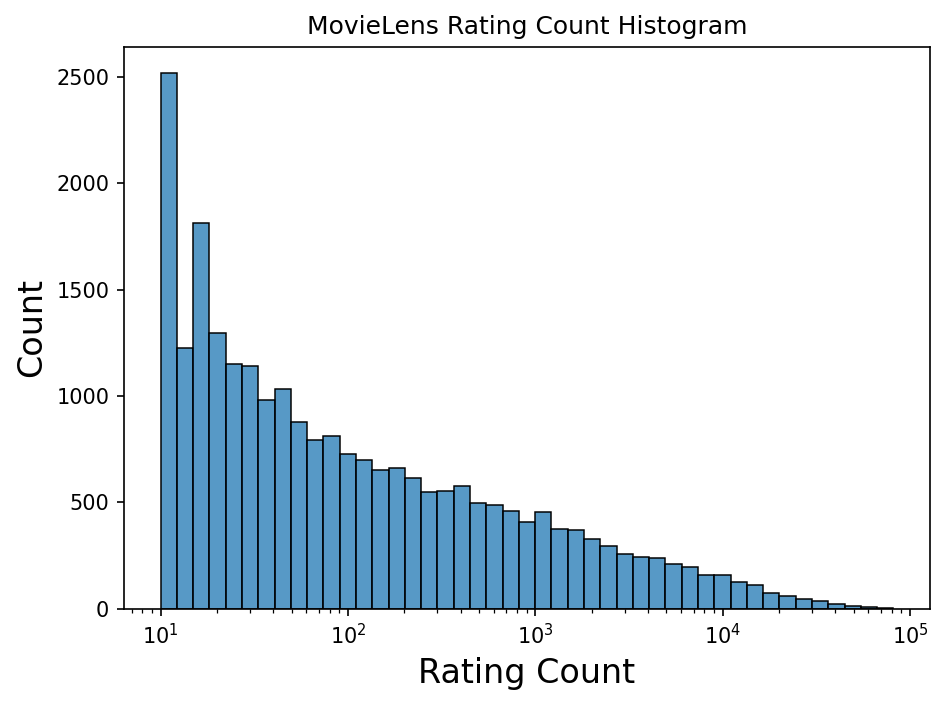

In [7]:
plot = sns.histplot(x=df1_counts['rating'], log_scale=True)
plot.set(title='MovieLens Rating Count Histogram', xlabel='Rating Count');

We can see that the most frequent count of ratings is around 10 with 2500 items falling in that range.  The top end is only one rating at just shy of 100k ratings (81k per the above table).  There is a nice hocky stick shape to this graph (we could eliminate the bump on the left side of the graph by changing the bin size, if we wanted to).

## Netflix Prize Analysis

Let us inspect the Netflix dataset.

In [8]:
display_stats(df2)

,item_id,user_id,rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3
...,...,...,...
51031350,9210,2420260,1
51031351,9210,761176,3
51031352,9210,459277,3
51031353,9210,2407365,4


,item_id,user_id,rating
count,5.103136e+07,5.103136e+07,5.103136e+07
mean,4.659441e+03,1.322400e+06,3.594161e+00
std,2.583608e+03,7.645480e+05,1.085369e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,2.452000e+03,6.611430e+05,3.000000e+00
50%,4.740000e+03,1.318880e+06,4.000000e+00
75%,6.829000e+03,1.984428e+06,4.000000e+00
max,9.210000e+03,2.649429e+06,5.000000e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51031355 entries, 0 to 51031354
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   item_id  int64
 1   user_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 1.1 GB

51,031,355 total ratings
9,210 distinct item IDs
478,018 distinct user IDs
4,402,545,780 total possible ratings
1.16% density


So we have 51M ratings by item_id/user_id.  Ratings are from 1 to 5 (so assuming a star rating system where you can't give a zero-rating or a half star rating and where every record has a rating - so no nulls).

So there are only around 9k different movies and TV shows but 478k different users which makes this a sparse rating matrix (otherwise there would be around 4.4B ratings) of only 1.16% populated values.

In [9]:
df2_counts = df2.groupby('item_id')[['rating']].count()
df2_counts.describe()

,rating
count,9210.000000
mean,5540.863735
std,16432.061634
min,10.000000
25%,188.000000
50%,553.000000
75%,2709.500000
max,232944.000000


We can see that the 9k items are represented in the groups with the fewest ratings being 10 and the most ratings being 232k.  The mean rating count is 5k +/- 16k.  The mean and standard deviation would be better represented on the log of the values (per the graph below).

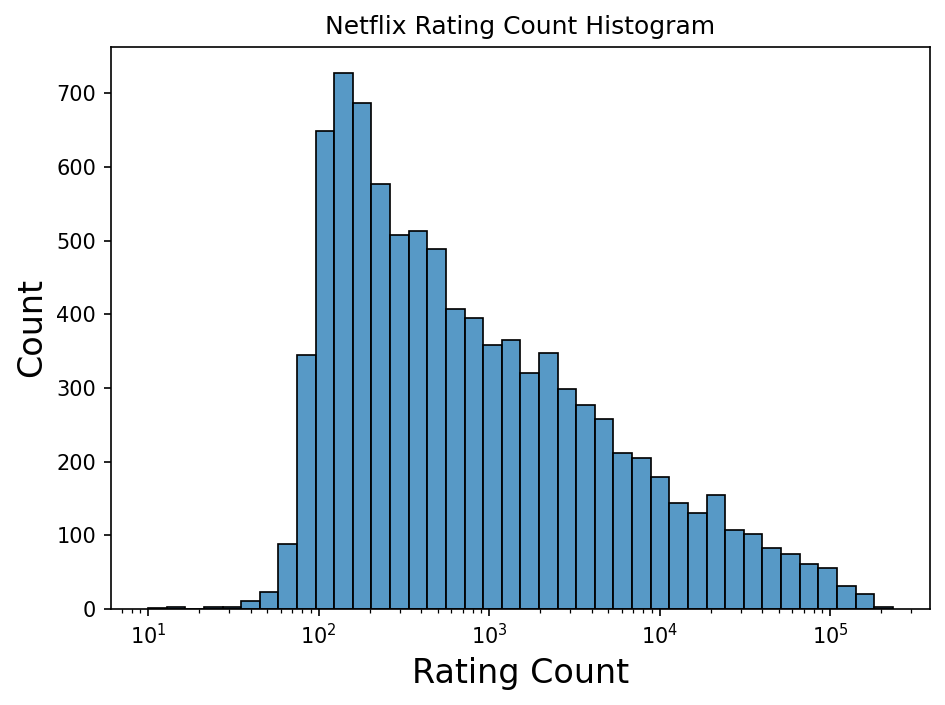

In [10]:
plot = sns.histplot(x=df2_counts['rating'], log_scale=True)
plot.set(title='Netflix Rating Count Histogram', xlabel='Rating Count');

This graph is more skewed towards the 100 rating count for items (around 700) with a steep leading edge and steady trailing edge.

## Yahoo Music Analysis

Let us look at the Yahoo dataset.

In [11]:
display_stats(df3)

,user_id,item_id,rating
35,1600003,87987,5
53,1600005,31429,2
125,1600012,83382,4
230,1600023,7223,4
390,1600039,17580,3
...,...,...,...
1999463,199946,56313,4
1999513,199951,18534,1
1999710,199971,1513,4
1999762,199976,19763,4


,user_id,item_id,rating
count,6.937275e+06,6.937275e+06,6.937275e+06
mean,9.117187e+05,6.666915e+04,3.127369e+00
std,5.259071e+05,4.171872e+04,1.603545e+00
min,1.000000e+00,1.180000e+02,1.000000e+00
25%,4.559910e+05,2.768300e+04,1.000000e+00
50%,9.113070e+05,6.712700e+04,3.000000e+00
75%,1.366701e+06,1.033120e+05,5.000000e+00
max,1.823177e+06,1.366890e+05,5.000000e+00


<class 'pandas.core.frame.DataFrame'>
Index: 6937275 entries, 35 to 1999917
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   item_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 211.7 MB

6,937,275 total ratings
1,368 distinct item IDs
1,255,262 distinct user IDs
1,717,198,416 total possible ratings
0.40% density


So we have 7M ratings by item_id/user_id.  Ratings are from 1 to 5 (so assuming a star rating system where you can't give a zero-rating or a half star rating and where every record has a rating - so no nulls).

So there are only around 1k different songs but 1.2M different users which makes this a sparse rating matrix (otherwise there would be around 1.7B ratings) of only 0.4% populated values.

In [12]:
df3_counts = df3.groupby('item_id')[['rating']].count()
df3_counts.describe()

,rating
count,1368.000000
mean,5071.107456
std,9486.314562
min,1000.000000
25%,1400.750000
50%,2207.500000
75%,4171.500000
max,113541.000000


We can see that the 1k items are represented in the groups with the fewest ratings being 1k and the most ratings being 113k.  The mean rating count is 5k +/- 9k.  The mean and standard deviation would be better represented on the log of the values (per the graph below).

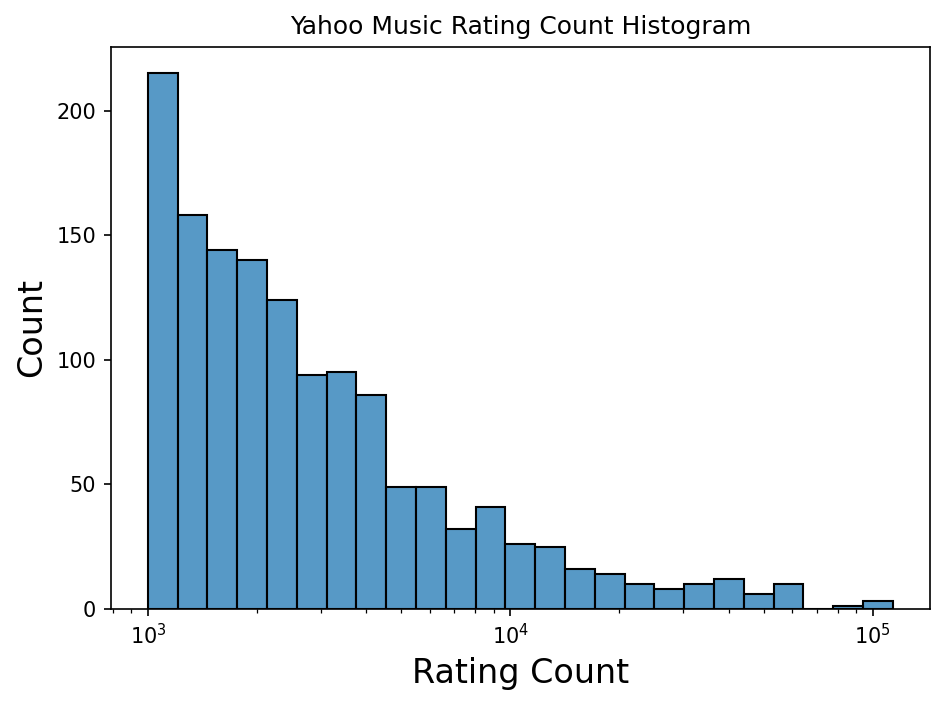

In [13]:
plot = sns.histplot(x=df3_counts['rating'], log_scale=True)
plot.set(title='Yahoo Music Rating Count Histogram', xlabel='Rating Count');

This graph shows that the largest bucket is 1k ratings with a little over 200 items having that many.  It has a steeper trailing edge (vs. the previous ones with had kind of a linear dropoff on the log scale).

## BoardGameGeek Analysis

Let us look at the BoardGameGeek dataset.

In [14]:
display_stats(df4)

,item_id,user_id,rating
0,213788,Tonydorrf,8.0
1,213788,tachyon14k,8.0
2,213788,Ungotter,8.0
3,213788,brainlocki3,8.0
4,213788,PPMP,8.0
...,...,...,...
18942210,165521,rseater,3.0
18942211,165521,Bluefox86,3.0
18942212,165521,serginator,3.0
18942213,193488,CaptainCattan,1.0


,item_id,rating
count,1.894222e+07,1.894222e+07
mean,1.099533e+05,7.130957e+00
std,9.280217e+04,1.543023e+00
min,1.000000e+00,1.000000e-04
25%,1.611000e+04,6.000000e+00
50%,1.075290e+05,7.000000e+00
75%,1.813040e+05,8.000000e+00
max,3.491610e+05,1.000000e+01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18942215 entries, 0 to 18942214
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   item_id  int64  
 1   user_id  object 
 2   rating   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 433.6+ MB

18,942,215 total ratings
21,925 distinct item IDs
411,374 distinct user IDs
9,019,374,950 total possible ratings
0.21% density


So we have 19M ratings by item_id/user_id.  Ratings are from 1 to 10 (no zeroes or nulls).

So there are only around 22k different games and 411k different users which makes this a sparse rating matrix (otherwise there would be around 9B ratings) of only 0.21% populated values.

In [15]:
df4_counts = df4.groupby('item_id')[['rating']].count()
df4_counts.describe()

,rating
count,21925.000000
mean,863.955074
std,3627.083866
min,7.000000
25%,57.000000
50%,125.000000
75%,398.000000
max,107760.000000


We can see that the 22k items are represented in the groups with the fewest ratings being 7 and the most ratings being 107k.  The mean rating count is 863 +/- 3.6k.  The mean and standard deviation would be better represented on the log of the values (per the graph below).

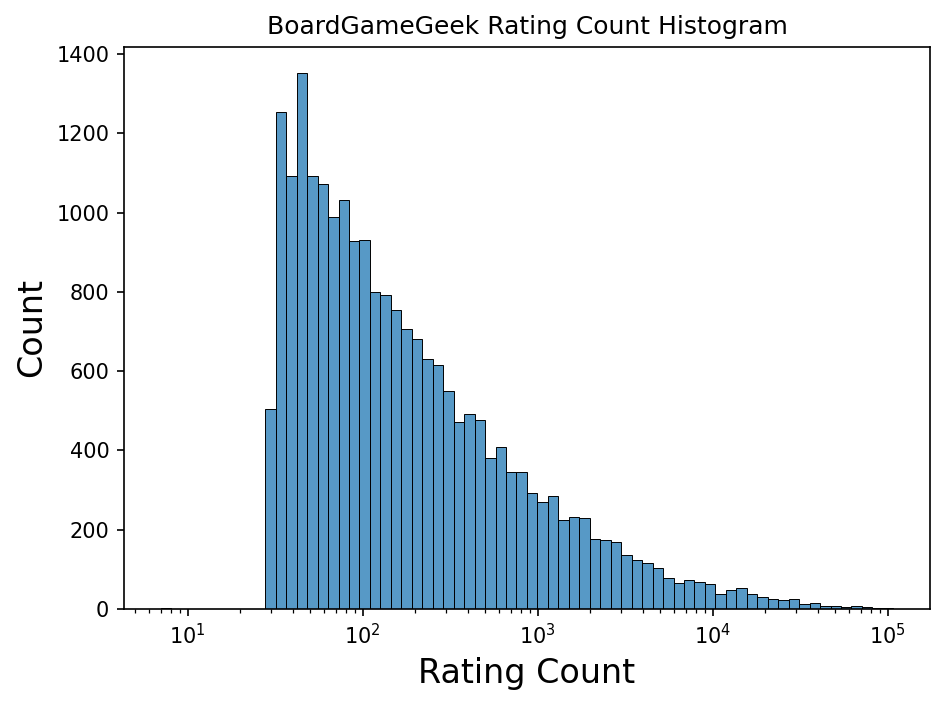

In [16]:
plot = sns.histplot(x=df4_counts['rating'], log_scale=True)
plot.set(title='BoardGameGeek Rating Count Histogram', xlabel='Rating Count');

The most common rating count is around 20 with just shy of 1400 games being rating that many times.  There is a very drastic leading edge which indicates there are only a handful of games that don't have at least that many ratings.  There is a pretty standard dropoff for the trailing edge with only a handful of games being rated in the 100k range (but still a significant number in the 10k range).